## <center> Visualization with Seaborn

Matplotlib has been at the forefront of scientific visualization with python for years. Yet, it often leaves much to be desired:
- Matplotlib’s API is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrame objects. In order to visualize data from a DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

Seaborn provides an API ontop of matplotlib that integrates with Pandas functionality, provides simple high-level functions for plotting.


In [1]:
import numpy as np
import pandas as pd
from analysis_tools.display import Display
# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # seaborn's method to set its chart style

<br>

> #### Histograms, KDE, and Densities

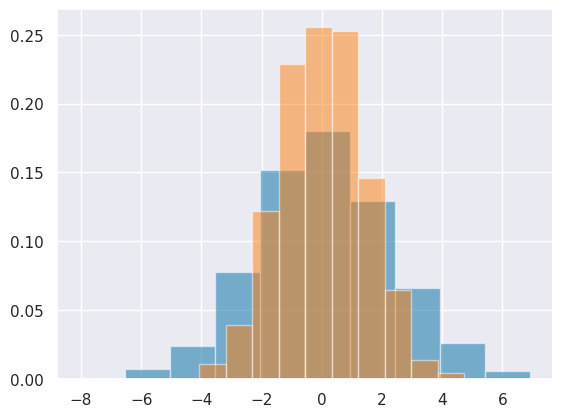

In [2]:
plt.style.use('tableau-colorblind10')
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

<Axes: ylabel='Density'>

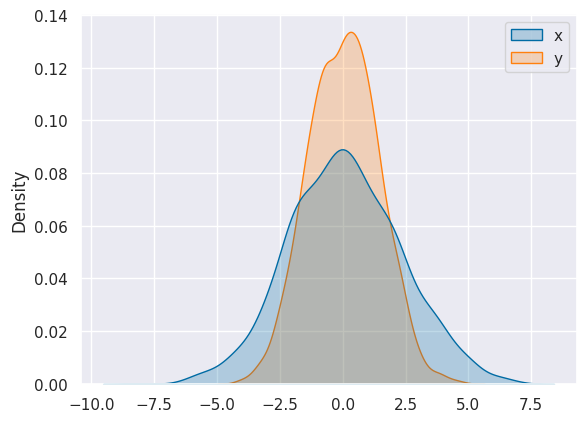

In [3]:
sns.kdeplot(data=data, fill=True)
# shade property is now deprecated in favour of fill

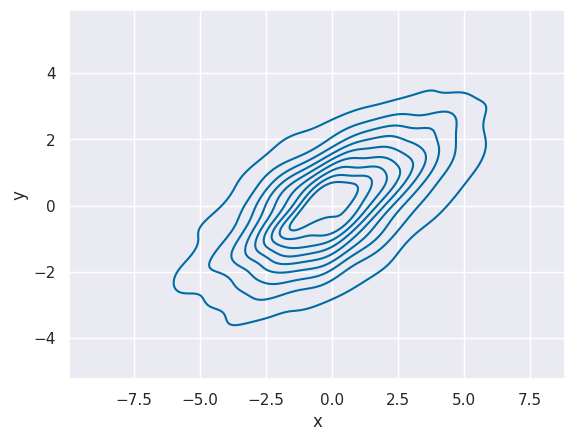

In [4]:
sns.kdeplot(data=data, x='x', y='y');

<br>

>#### Pair Plots

In [5]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


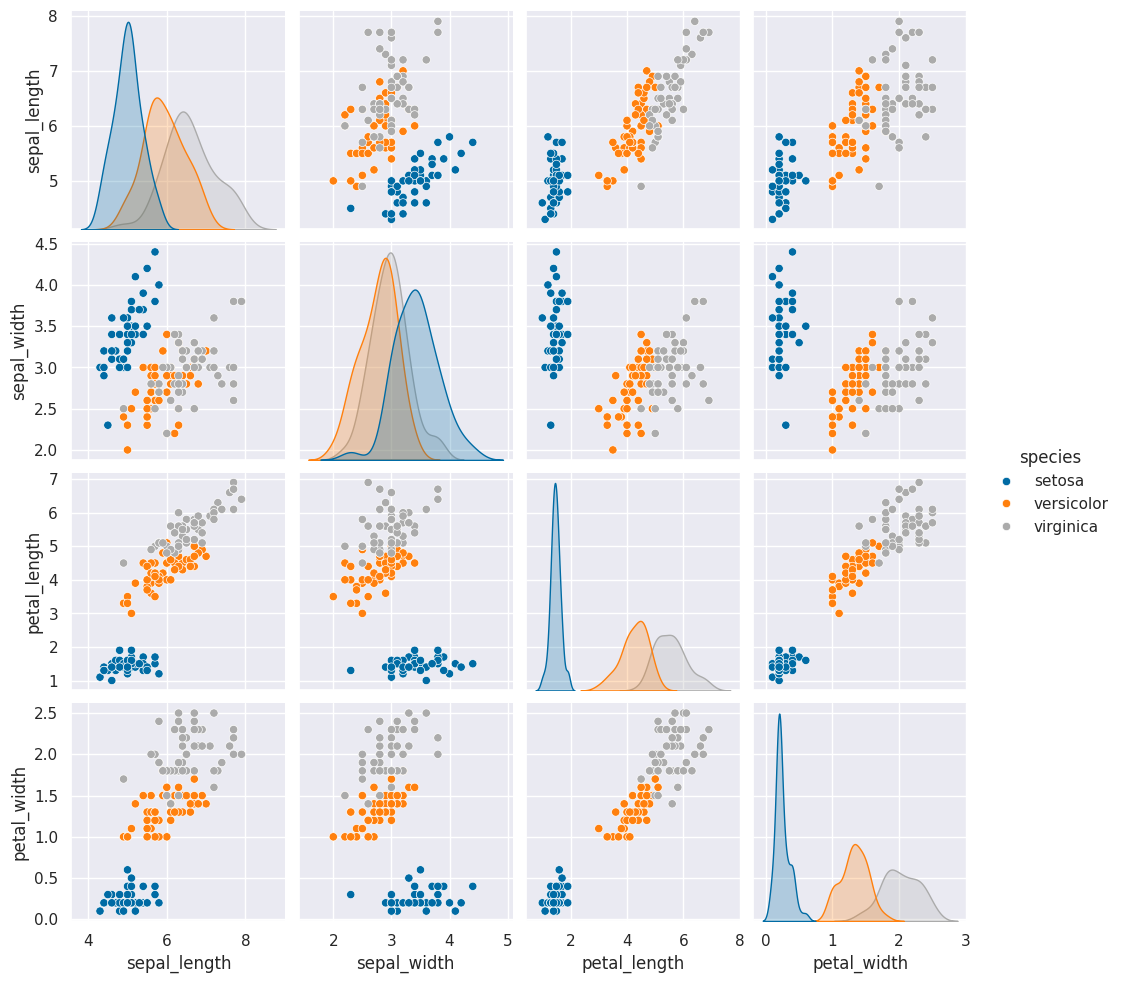

In [6]:
sns.pairplot(iris, hue='species', height=2.5)

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


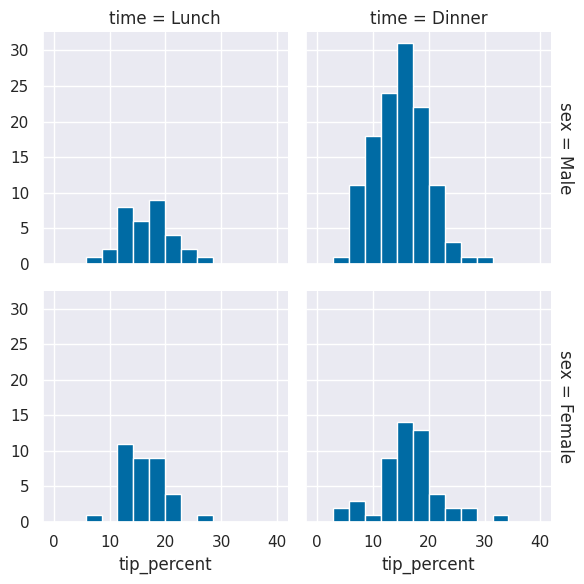

In [8]:
tips['tip_percent'] = 100 * tips['tip']/tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_percent", bins=np.linspace(0, 40, 15));

<br>

> ### Categorical Plots

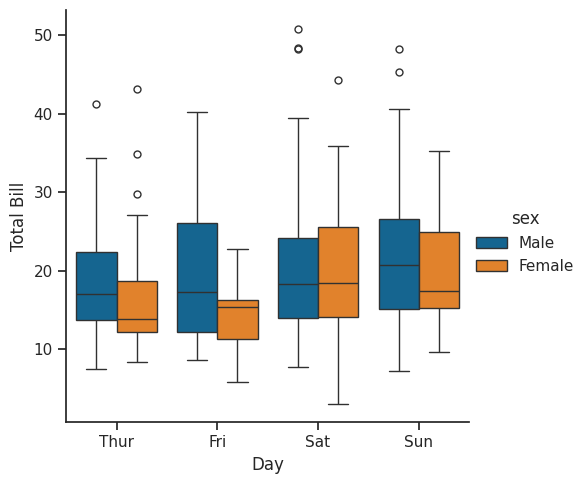

In [9]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

<br>

> #### Joint Distributions

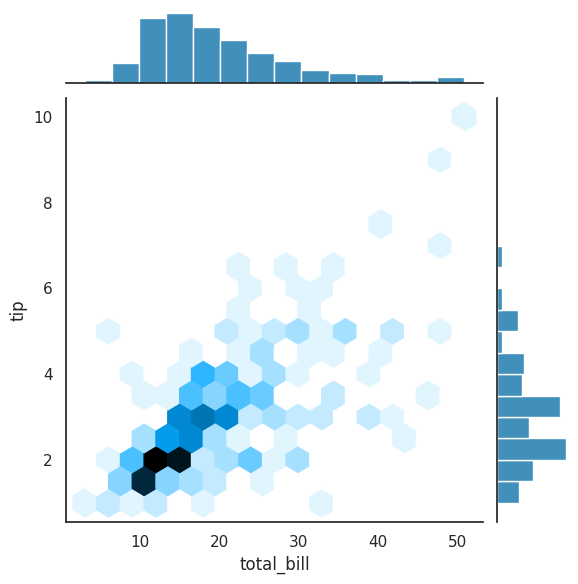

In [10]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

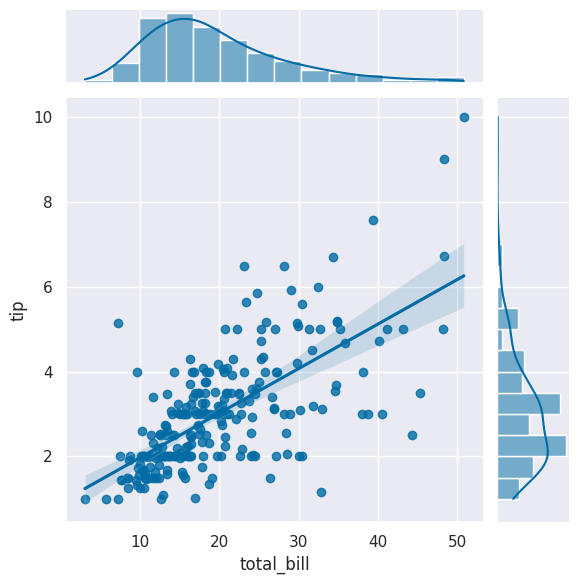

In [11]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

> #### Bar Plots

In [12]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


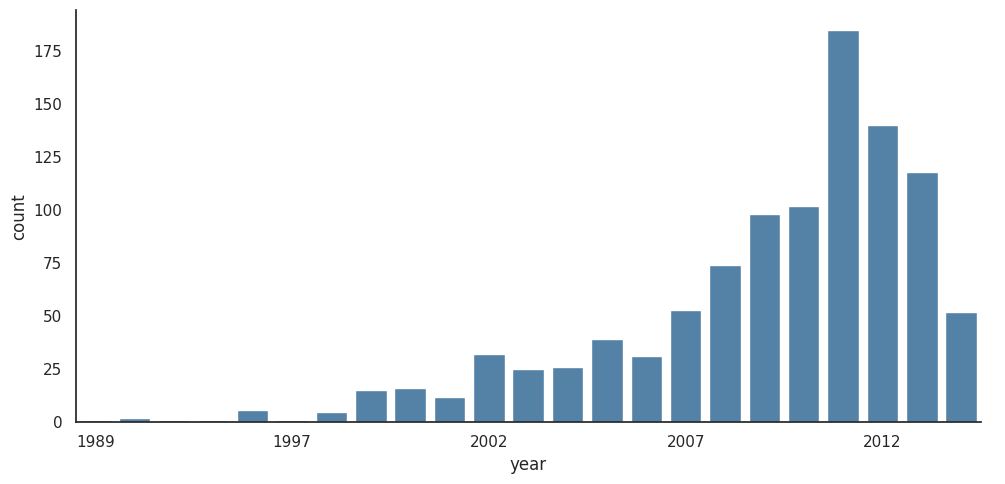

In [13]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2, kind="count", color="steelblue")
    g.set_xticklabels(step=5)

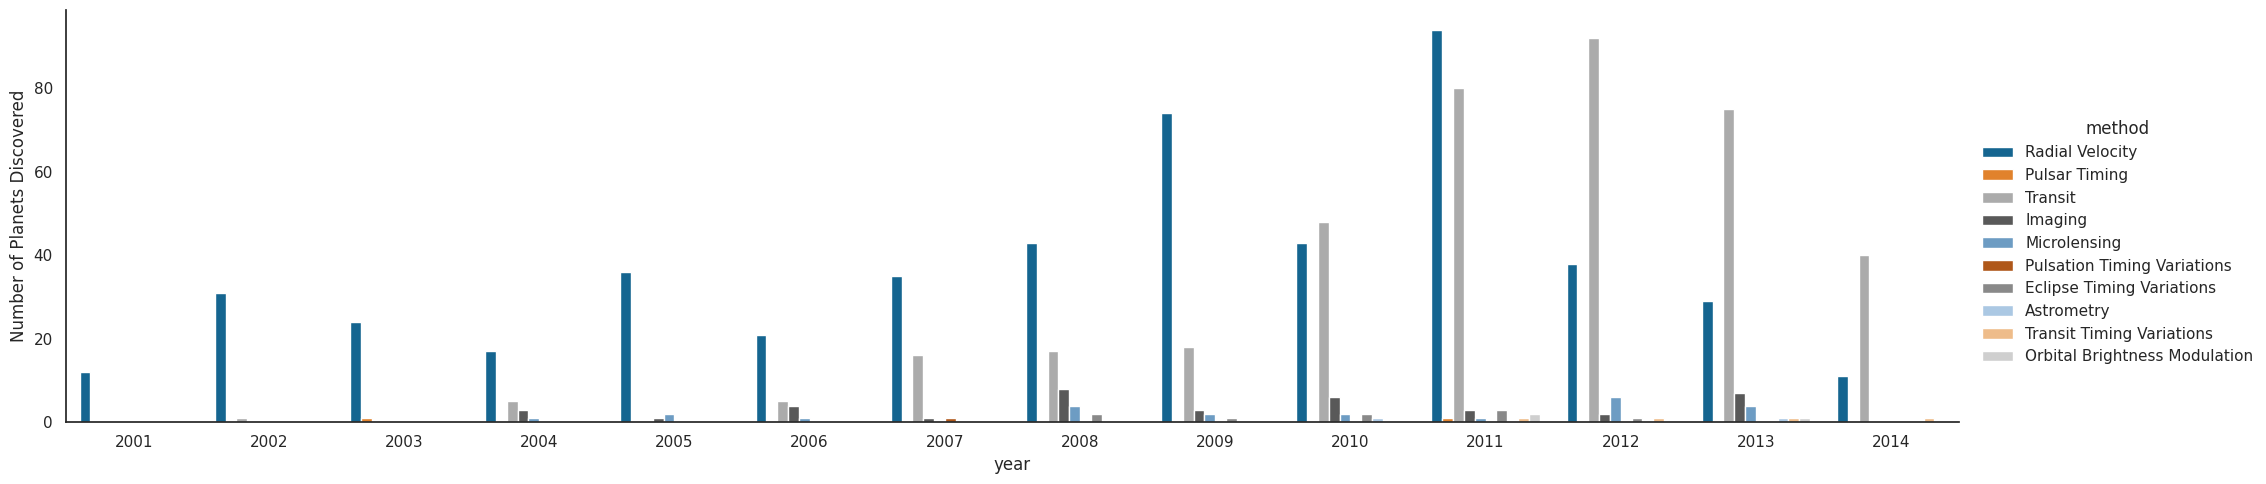

In [14]:
with sns.axes_style('white'):
    # plot options are: 'strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count', and 'point'
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind="count", hue="method", order=range(2001, 2015))
    g.set_ylabels("Number of Planets Discovered")

<br>

### Example: Exploring Marathon Finishing times

In [15]:
url = ('https://raw.githubusercontent.com/jakevdp/' 'marathon-data/master/marathon-data.csv')
!cd ../data && curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0   591k      0  0:00:01  0:00:01 --:--:--  591k


In [16]:
data = pd.read_csv('../data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [18]:
# Pandas loaded the time columns as Python strings. Let's convert them
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [27]:
import datetime
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)
data = pd.read_csv('../data/marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
data.head()


,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [29]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [32]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
# use astype instead of view
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


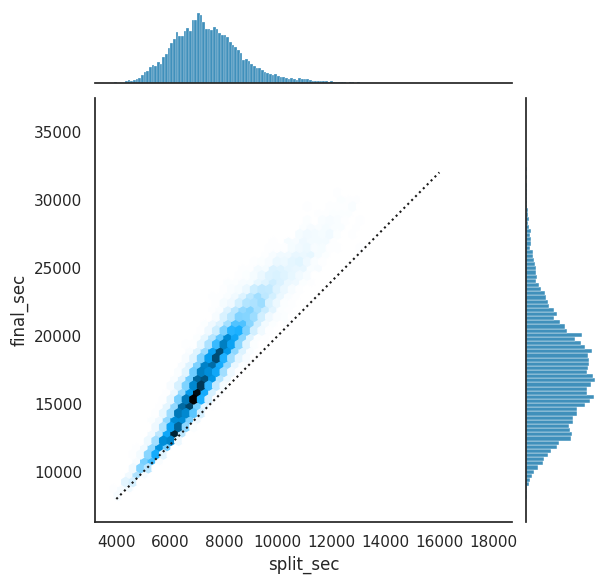

In [41]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows runners' time if they ran the marathon at a
perfectly steady pace. The fact that the distribution lies above this indicates (as you
might expect) that most people slow down over time
Although competitive runners can run faster during the second half of the race, they are said to have “negative-split” the race.

In [35]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


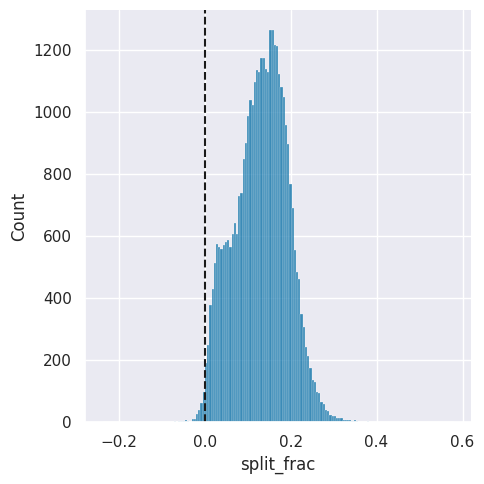

In [36]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--")

In [37]:
# the number of runners out of the 40,000 that negative-split the race
sum(data.split_frac < 0)

251

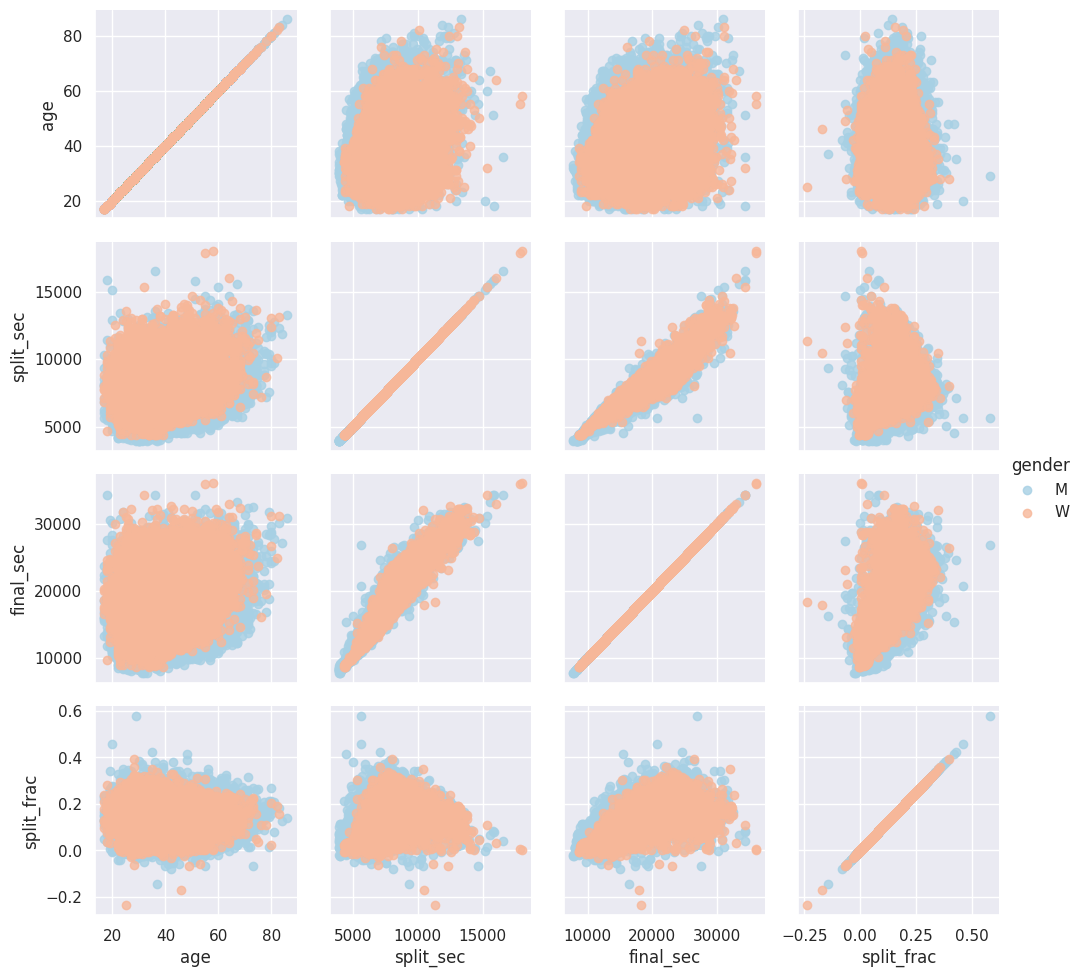

In [42]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

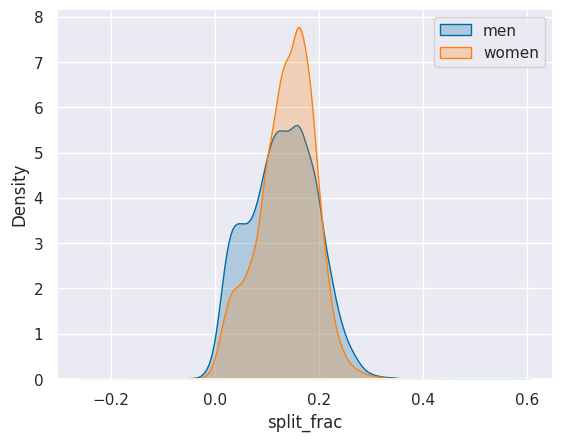

In [55]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');
plt.legend()

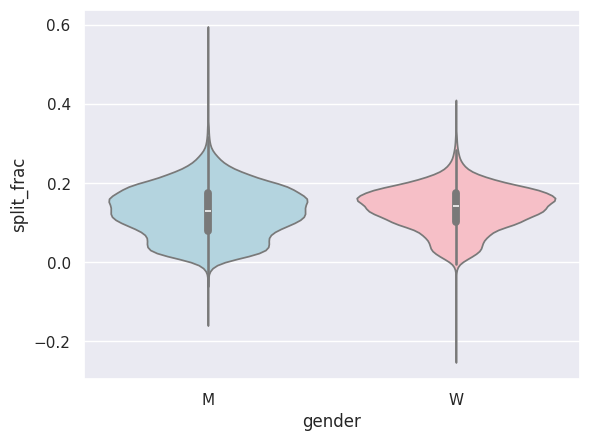

In [46]:
sns.violinplot(x="gender", y="split_frac", data=data, hue="gender", palette=["lightblue", "lightpink"]);

In [45]:
data['age_decade'] = data.age.map(lambda age: 10 * (age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_decade
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


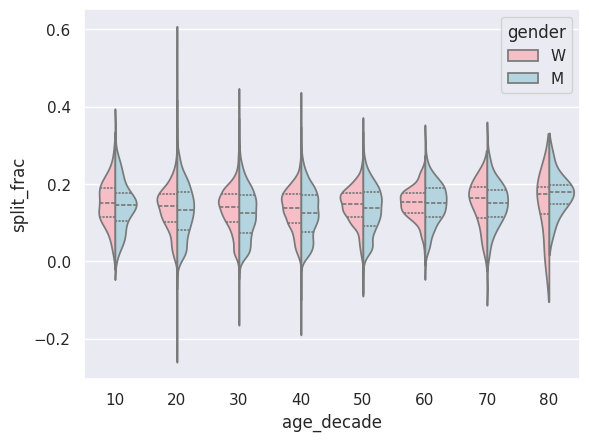

In [63]:
men = (data.gender=='M')
women = (data.gender=='W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_decade", y="split_frac", split=True, data=data, inner="quartile",
                  hue="gender", palette=["lightpink", "lightblue"]);

- Men between their 20s ~ 50s show a more pronounced density towards lower splits than any other age group.
- Women above 80 years of age seem to outperform everyone else in terms of split time (possbly due to small number of participants in the age group)


In [81]:
data[(data.age > 80) & (data.gender == 'W')]

,age,gender,split,final,split_sec,final_sec,split_frac,age_decade
35915,82,W,0 days 02:48:26,0 days 06:55:31,10106.0,24931.0,0.189282,80
37214,83,W,0 days 03:39:09,0 days 08:39:38,13149.0,31178.0,0.156521,80


>The regression plot below asks if split fraction correlates with faster finish times?

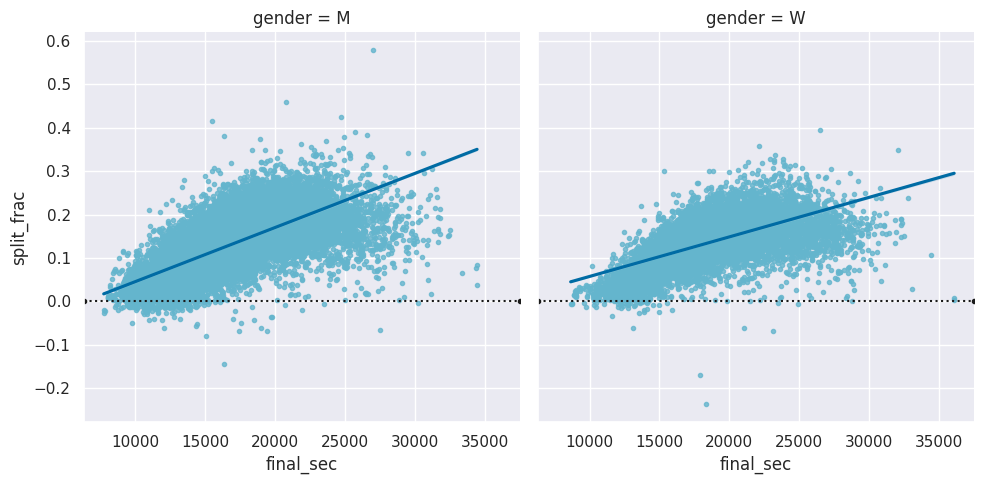

In [82]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))

# line separating positive-split from negative-split
g.map(plt.axhline, y=0.0, color="k", ls=":")